In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
DS = pd.read_csv("Airline_Delay_Cause.csv")
DS.head()

year  month carrier       carrier_name airport  \
0  2022      5      9E  Endeavor Air Inc.     ABE   
1  2022      5      9E  Endeavor Air Inc.     ABY   
2  2022      5      9E  Endeavor Air Inc.     ACK   
3  2022      5      9E  Endeavor Air Inc.     AEX   
4  2022      5      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...        136.0        7.0   
1             Albany, GA: Southwest Georgia Regional         91.0       16.0   
2                  Nantucket, MA: Nantucket Memorial         19.0        2.0   
3           Alexandria, LA: Alexandria International         88.0       14.0   
4        Augusta, GA: Augusta Regional at Bush Field        181.0       19.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        5.95        0.00  ...          0.0              1.00            0.0   
1        7.38        0.00  ...          0.0              6.09            0.0   
2        0.13        0.00  ...          0.0              0.88            1.0   
3        7.26        0.76  ...          0.0              1.64            0.0   
4       13.84        0.00  ...          0.0              2.09            0.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0      255.0          222.0            0.0        4.0   
1           0.0      884.0          351.0            0.0       81.0   
2           0.0      138.0            4.0            0.0      106.0   
3           0.0      947.0          585.0           35.0      125.0   
4           0.0      808.0          662.0            0.0       87.0   

   security_delay  late_aircraft_delay  
0             0.0                 29.0  
1             0.0                452.0  
2             0.0                 28.0  
3             0.0                202.0  
4             0.0                 59.0  

[5 rows x 21 columns]

In [5]:
DS.describe()

year          month    arr_flights      arr_del15  \
count  318017.000000  318017.000000  317529.000000  317289.000000   
mean     2012.450957       6.497844     381.763984      72.904403   
std         5.678296       3.459423    1027.148994     198.935595   
min      2003.000000       1.000000       1.000000       0.000000   
25%      2007.000000       3.000000      59.000000       9.000000   
50%      2012.000000       6.000000     120.000000      23.000000   
75%      2018.000000      10.000000     273.000000      56.000000   
max      2022.000000      12.000000   21977.000000    6377.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  317529.000000  317529.000000  317529.000000  317529.000000   
mean       21.072980       2.616379      24.005228       0.179037   
std        47.671306       9.968549      85.113757       0.844834   
min         0.000000       0.000000      -0.010000       0.000000   
25%         3.000000       0.000000       1.680000       0.000000   
50%         8.190000       0.580000       5.490000       0.000000   
75%        19.690000       2.000000      15.350000       0.000000   
max      1792.070000     717.940000    4091.270000      80.560000   

       late_aircraft_ct  arr_cancelled   arr_diverted      arr_delay  \
count     317529.000000  317529.000000  317529.000000  317529.000000   
mean          24.975734       7.207257       0.867672    4209.947536   
std           75.275223      37.216301       3.915760   12518.907854   
min            0.000000       0.000000       0.000000       0.000000   
25%            1.640000       0.000000       0.000000     436.000000   
50%            5.860000       1.000000       0.000000    1201.000000   
75%           17.040000       4.000000       1.000000    3080.000000   
max         1885.470000    4951.000000     256.000000  433687.000000   

       carrier_delay  weather_delay      nas_delay  security_delay  \
count  317529.000000  317529.000000  317529.000000   317529.000000   
mean     1286.583503     220.567542    1099.516422        7.214799   
std      3515.397263     861.521440    4636.475908       38.854566   
min         0.000000       0.000000     -19.000000        0.000000   
25%       148.000000       0.000000      56.000000        0.000000   
50%       437.000000      25.000000     203.000000        0.000000   
75%      1100.000000     159.000000     602.000000        0.000000   
max    196944.000000   57707.000000  238440.000000     3760.000000   

       late_aircraft_delay  
count        317529.000000  
mean           1596.062993  
std            4924.950687  
min               0.000000  
25%              79.000000  
50%             351.000000  
75%            1110.000000  
max          148181.000000

Дивлячись на це все, я зараз absolutely terrified та не знаю з чого починати. Але перше, що приходить на думку - дослідити залежність частоти скасувань та запізнень від місяця року. 

Спочатку подивлюся як справи з датасетом. Наприклад, є записи як з 1 рейсом на місяць, так і з 22000. Є від'ємні значення там, де має бути час. 

<AxesSubplot:xlabel='arr_flights'>

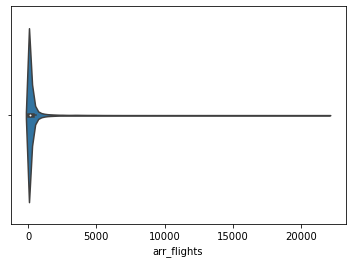

In [9]:
sns.violinplot(x=DS['arr_flights'])

In [10]:
DS.nlargest(8, 'arr_flights')

year  month carrier          carrier_name airport  \
102229  2016      8      DL  Delta Air Lines Inc.     ATL   
75317   2018      8      DL  Delta Air Lines Inc.     ATL   
54722   2019      8      DL  Delta Air Lines Inc.     ATL   
56500   2019      7      DL  Delta Air Lines Inc.     ATL   
76872   2018      7      DL  Delta Air Lines Inc.     ATL   
103281  2016      7      DL  Delta Air Lines Inc.     ATL   
114716  2015      8      DL  Delta Air Lines Inc.     ATL   
105305  2016      5      DL  Delta Air Lines Inc.     ATL   

                                             airport_name  arr_flights  \
102229  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21977.0   
75317   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21931.0   
54722   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21873.0   
56500   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21839.0   
76872   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21688.0   
103281  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21681.0   
114716  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21648.0   
105305  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...      21623.0   

        arr_del15  carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  \
102229     3307.0     1242.16       89.11  ...         3.33           1168.04   
75317      2852.0      755.76      162.84  ...         3.00           1032.40   
54722      2729.0      768.64      167.13  ...         1.52            996.74   
56500      3506.0      966.33      175.11  ...         2.56           1253.82   
76872      3323.0      727.77      188.68  ...         1.11           1231.08   
103281     3368.0      946.10      168.44  ...         3.84           1157.00   
114716     2679.0      725.60      118.05  ...         0.00            965.57   
105305     2125.0      667.73       82.10  ...         2.00            805.37   

        arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
102229          598.0          23.0   395609.0       196944.0         8108.0   
75317            32.0          47.0   213951.0        68859.0        13357.0   
54722            26.0          16.0   197273.0        75725.0        15290.0   
56500            78.0          74.0   298239.0        97970.0        16447.0   
76872            33.0          88.0   262779.0        66972.0        15538.0   
103281           45.0         110.0   295235.0        95768.0        17400.0   
114716           17.0          92.0   179390.0        66784.0         8846.0   
105305            4.0          13.0   138138.0        63911.0         8722.0   

        nas_delay  security_delay  late_aircraft_delay  
102229    61036.0           321.0             129200.0  
75317     52660.0           161.0              78914.0  
54722     37054.0            85.0              69119.0  
56500     72655.0            85.0             111082.0  
76872     74691.0            90.0             105488.0  
103281    74898.0           121.0             107048.0  
114716    44096.0             0.0              59664.0  
105305    20660.0           167.0              44678.0  

[8 rows x 21 columns]

Бачимо, що це валідні записи, що просто стосуються великої авіакомпанії.

In [12]:
DS.nsmallest(5, 'nas_delay')

year  month carrier                 carrier_name airport  \
314425  2003      8      B6              JetBlue Airways     SLC   
294993  2004     11      EV  Atlantic Southeast Airlines     BWI   
29      2022      5      9E            Endeavor Air Inc.     CMH   
42      2022      5      9E            Endeavor Air Inc.     EYW   
43      2022      5      9E            Endeavor Air Inc.     FAY   

                                             airport_name  arr_flights  \
314425   Salt Lake City, UT: Salt Lake City International         62.0   
294993  Baltimore, MD: Baltimore/Washington Internatio...         30.0   
29        Columbus, OH: John Glenn Columbus International          1.0   
42                   Key West, FL: Key West International          3.0   
43      Fayetteville, NC: Fayetteville Regional/Granni...         92.0   

        arr_del15  carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  \
314425       11.0        5.22        0.79  ...         0.07              4.25   
294993        7.0        3.51        3.51  ...         0.00              0.00   
29            0.0        0.00        0.00  ...         0.00              0.00   
42            0.0        0.00        0.00  ...         0.00              0.00   
43           10.0        8.58        0.00  ...         0.00              1.42   

        arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
314425            0.0           0.0     1097.0          660.0           93.0   
294993            0.0           0.0      414.0          199.0          216.0   
29                0.0           0.0        0.0            0.0            0.0   
42                0.0           0.0        0.0            0.0            0.0   
43                0.0           0.0      485.0          447.0            0.0   

        nas_delay  security_delay  late_aircraft_delay  
314425      -19.0            10.0                353.0  
294993       -1.0             0.0                  0.0  
29            0.0             0.0                  0.0  
42            0.0             0.0                  0.0  
43            0.0             0.0                 38.0  

[5 rows x 21 columns]

А тут якість викиди, які я б ігнорував

Йдемо далі. Кореляційна матриця як перші кроки з пошуку залежностей.
Тільки замість номеру місяця $m \in [1,12] \cup \mathbb N$ я спробую взяти $\sin 2\pi\frac{m-0.5}{12}$. Нещодавно знайомий датасатаніст розповів про цей трюк для циклічних значень як номер місяця чи дня тижня.

In [13]:
DS['sin_month'] = np.sin( (DS['month']-0.5) * np.pi/6 )

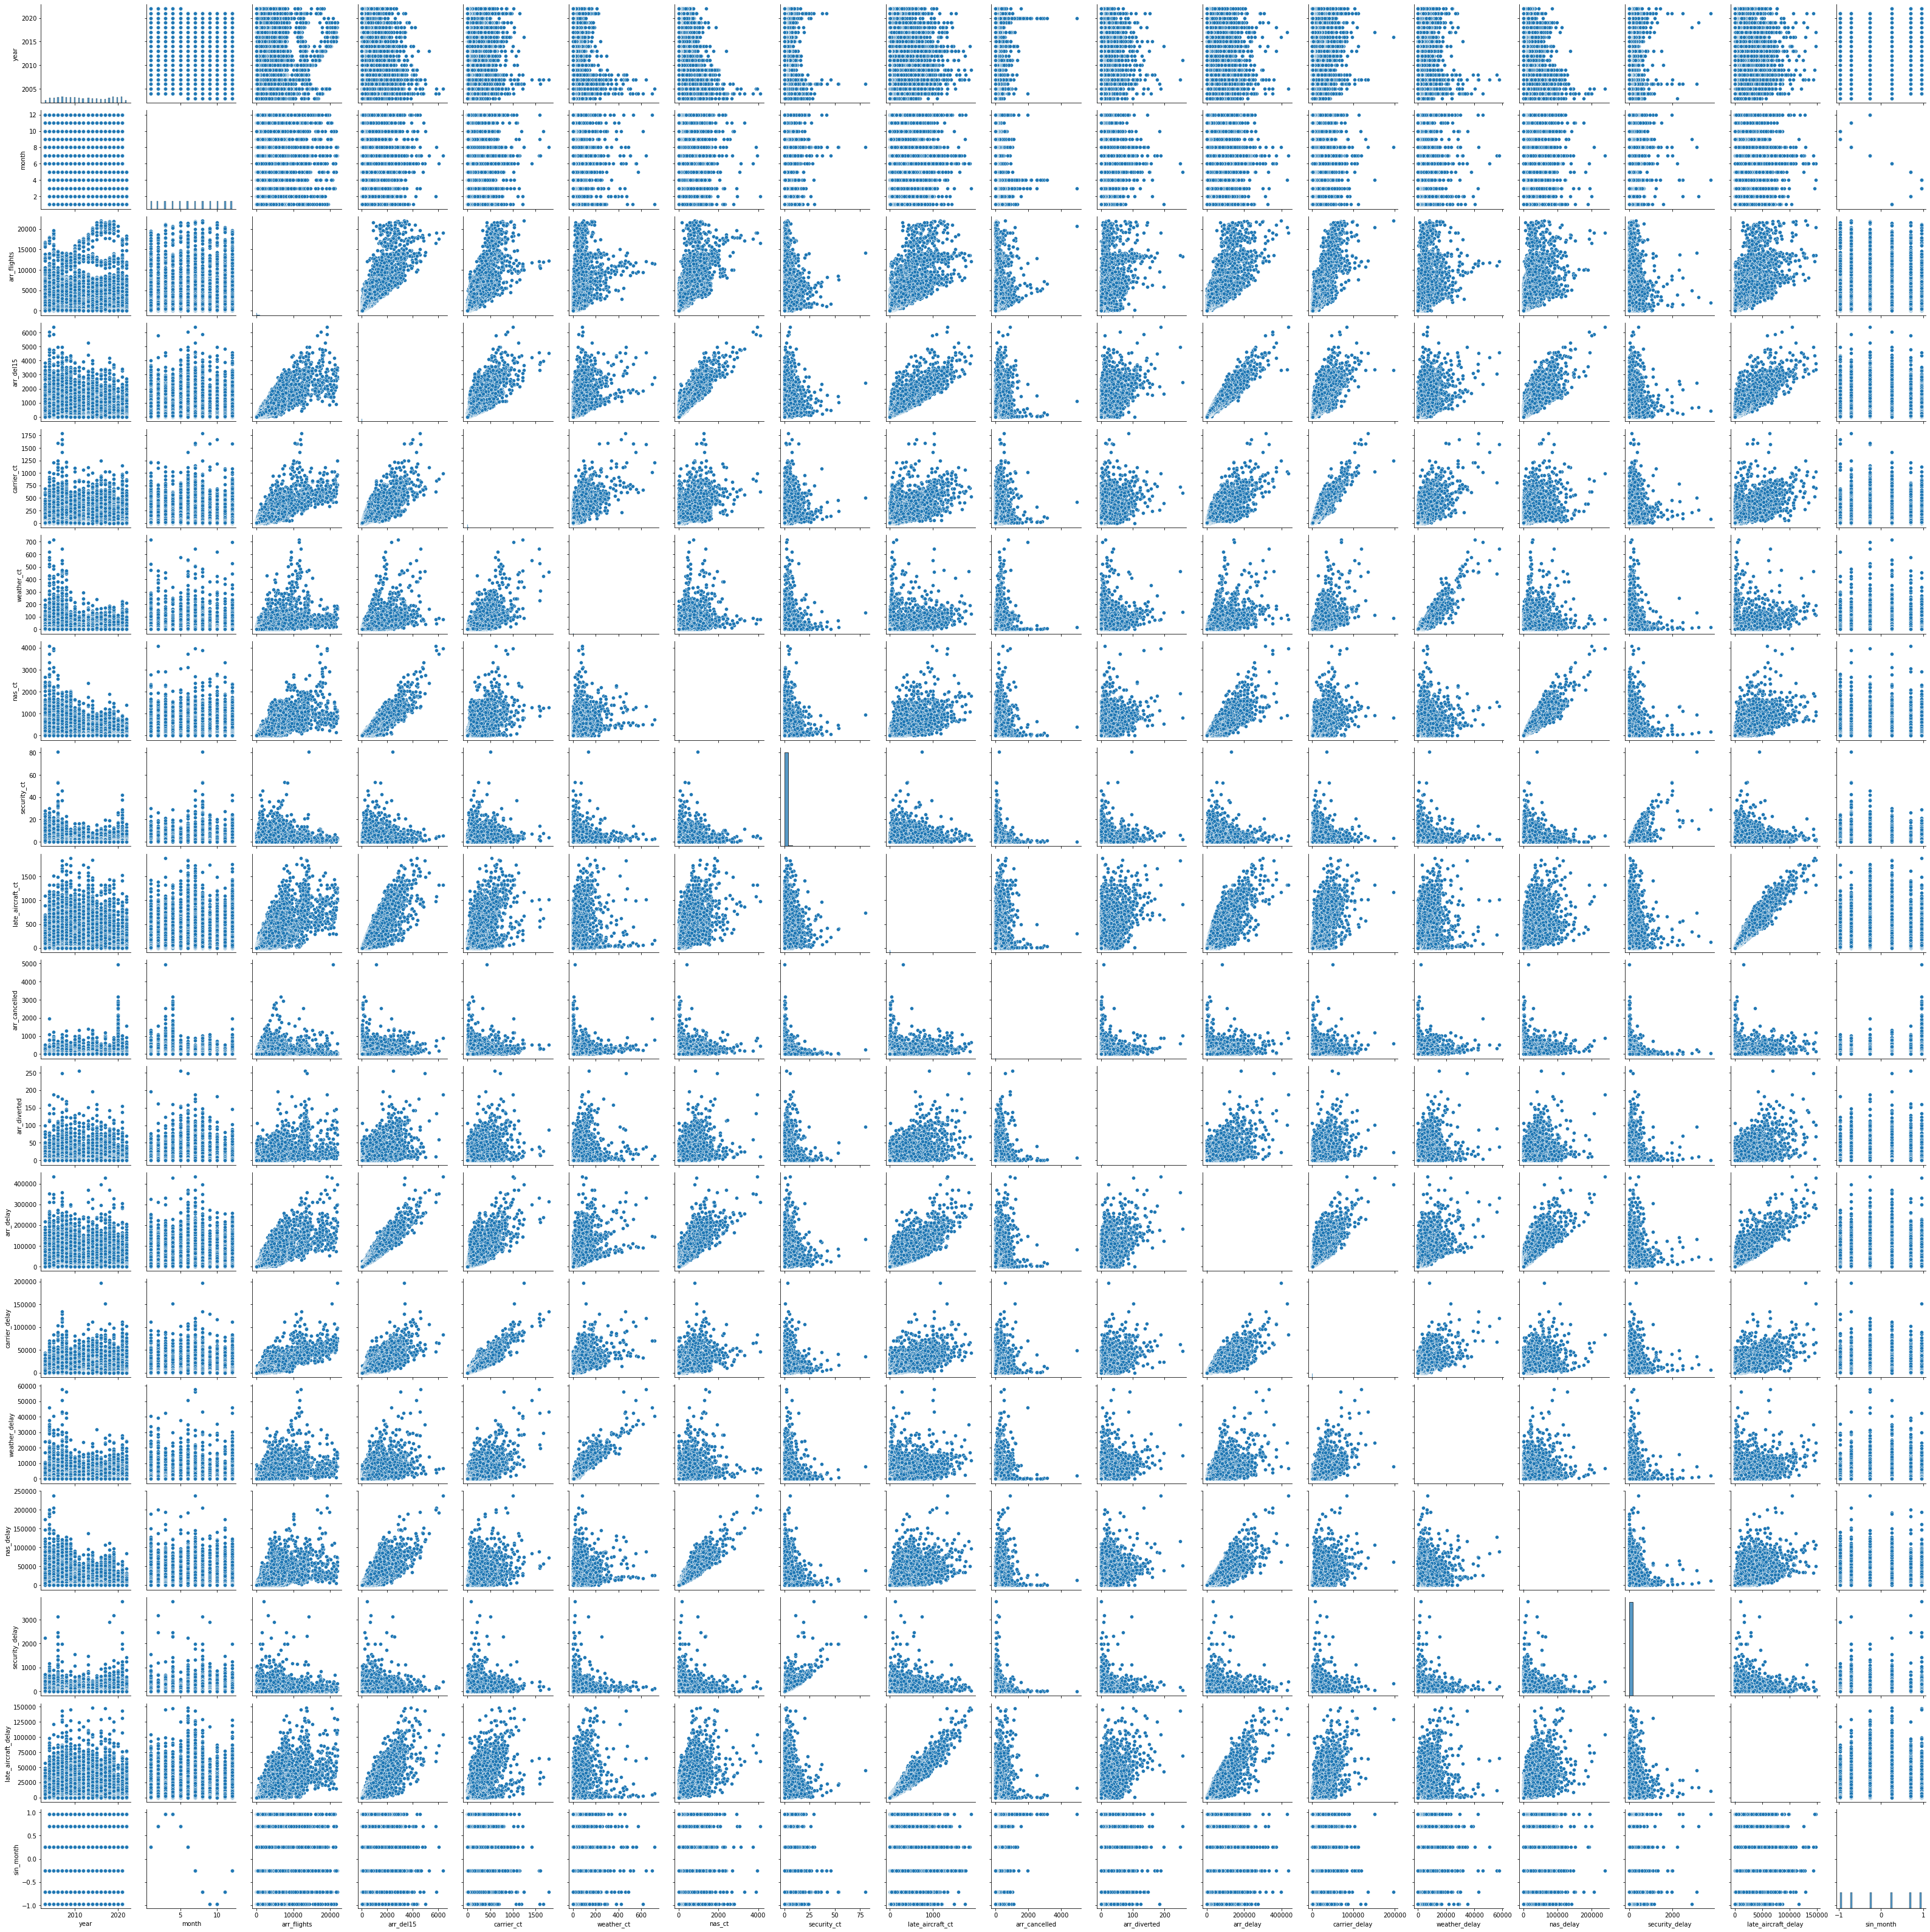

In [14]:
sns.pairplot(DS)

Обчисленя зайняло 6 хвилин, але виглядає потрясно.

1. Кількість запізнень пари аеропорт-авіалінія корелює з тривалістю запізнень; і так для кожної категорії запізнень
2. Моя ідея з синусом замість номеру місяця провалилася, бо в мене в кожне значення відображається по два номера місяця
3. Гіпотеза про залежність кількості запізнень від пори року виглядає ще більш ймовірною 

Я спробую мапити номер місяця в пару сінуса та косінуса, а регресію робити по двум аргументам, а не одному.


In [18]:
ms = np.arange(1,13)
ms

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

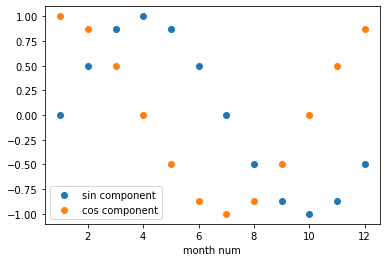

In [24]:
msin = np.sin(np.pi*2*(ms-1)/12)
mcos = np.cos(np.pi*2*(ms-1)/12)
plt.scatter(ms,msin, label='sin component')
plt.scatter(ms,mcos, label='cos component')
plt.xlabel("month num")
plt.legend()

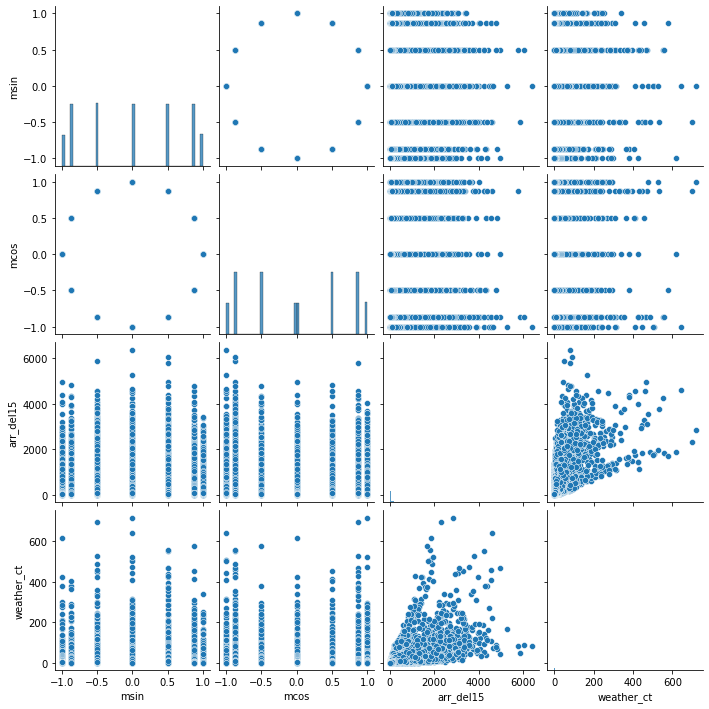

In [5]:
DS['msin'] = np.sin(np.pi*2*(DS['month']-1)/12)
DS['mcos'] = np.cos(np.pi*2*(DS['month']-1)/12)


З таким розкидом по значенням кількості рейсів явно треба вводити нормалізацію. Я буду тепер розглядати не кількість відкладених рейсів, а їх частку відносно кількості всіх рейсів

In [7]:
DS['p_arr_del15'] = DS['arr_del15'] / DS['arr_flights']
DS['p_weather_ct'] = DS['weather_ct'] / DS['arr_flights']

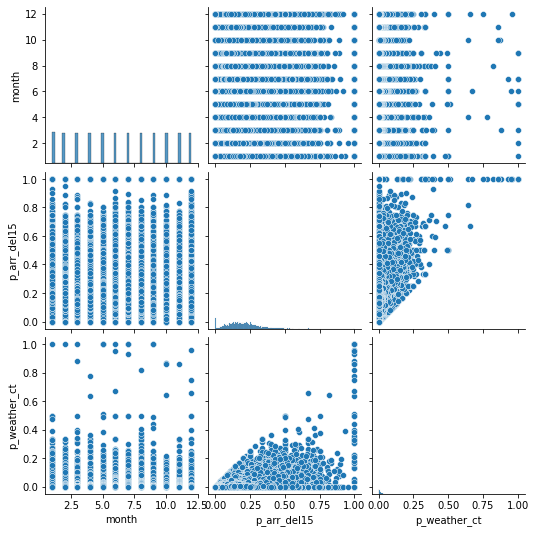

In [30]:
sns.pairplot(DS[['month','p_arr_del15','p_weather_ct']])

<AxesSubplot:>

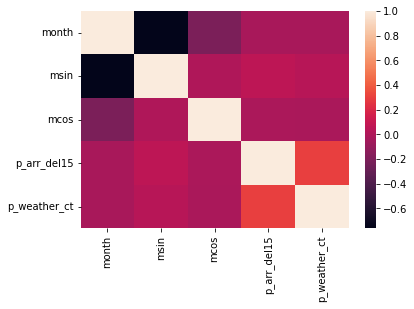

In [33]:
DS1 = DS[['month','msin','mcos','p_arr_del15','p_weather_ct']]
C = DS1.corr()
sns.heatmap(C)

Тут я зрозумів, що мабуть варто згрупувати дані по місяцям та рокам, бо це капець

In [8]:
DS2 = DS1[['month', 'p_arr_del15', 'p_weather_ct']].groupby('month').sum().reset_index()
DS2['msin'] = np.sin(np.pi*2*(DS2['month']-1)/12)
DS2['mcos'] = np.cos(np.pi*2*(DS2['month']-1)/12)
DS2

NameError: name 'DS1' is not defined

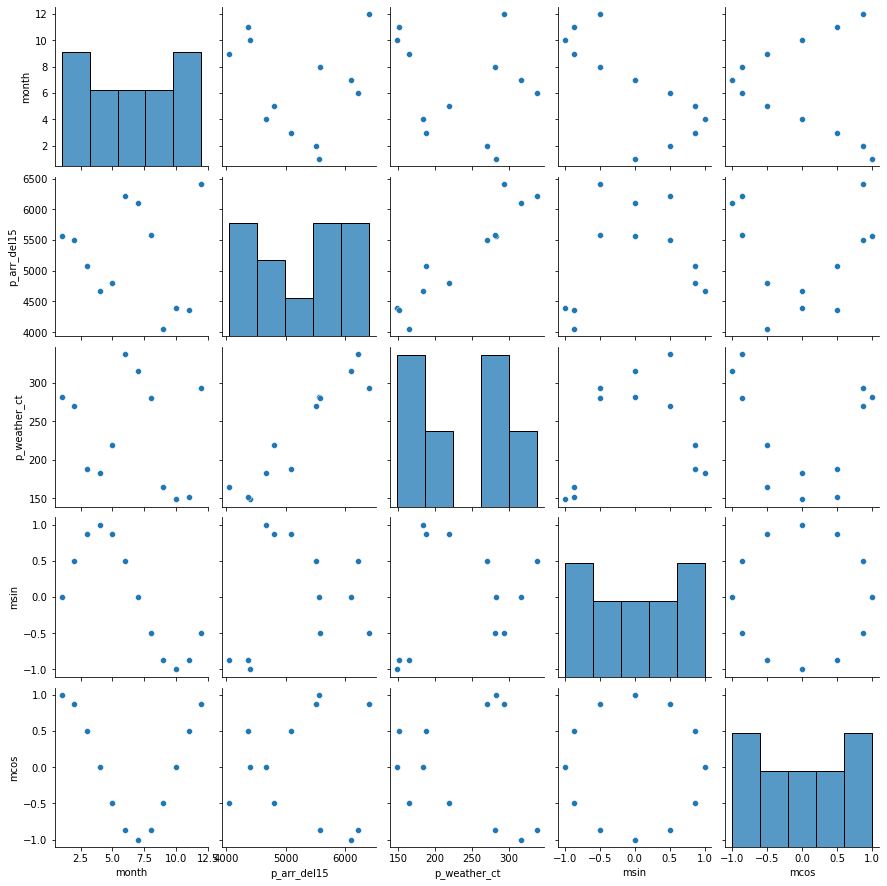

In [50]:
sns.pairplot(DS2)

In [1]:
DS_c1 = DS.dropna(subset=['p_weather_ct'])

NameError: name 'DS' is not defined

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    DS_c1[['msin','mcos']], DS_c1['p_weather_ct'], test_size=0.33, random_state=42)

In [65]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.0013353833637836932

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    DS_c1[['month']], DS_c1['p_weather_ct'], test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.0004889465330282228